In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# right-hand side of ODE

def f(r, X, gamma):
    f1 = X[1]
    f2 = -2*X[1]/r + 2*(X[2] - gamma)*X[0]
    f3 = X[3]
    f4 = -2*X[3]/r + np.power(X[0],2)
    return np.array([f1, f2, f3, f4])

# interval of solution and number of steps
ri, rf = 0, 10
steps = 1000
dr = (rf - ri)/steps
rinterv = np.linspace(ri, rf, steps, endpoint=True)

# single step of RK4
def rk4step(r, X, gamma):
    k1 = dr*f(r, X, gamma)
    k2 = dr*f(r + dr/2, X + k1/2, gamma)
    k3 = dr*f(r + dr/2, X + k2/2, gamma)
    k4 = dr*f(r + dr, X + k3, gamma)
    return X + (k1 + 2*k2 + 2*k3 + k4)/6

def rk4(Xbc, w):
    # initialize the arrays
    Xs = np.zeros((4, steps))

    # boundary conditions at r = ri
    Xs[..., 0] = Xbc

    # perform RK4
    for step in np.arange(1, steps):
        rnow = rinterv[step]
        Xs[..., step] = rk4step(rnow, Xs[..., step - 1], gamma)
    
        if np.abs(Xs[0, step]) > 100:
            return None

    return Xs

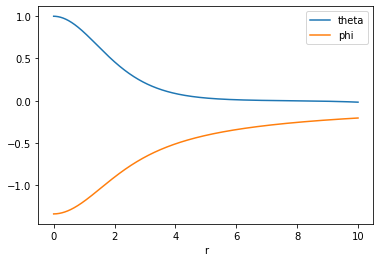

In [10]:
# Reproducing solution from Doddy's papper
gamma, phi0 = -0.692, -1.3415238997
Xbc = np.array([1, 0, phi0, 0])

Xs = rk4(Xbc, gamma)
plt.plot(rinterv, Xs[0].T, label = "theta")
plt.plot(rinterv, Xs[2].T, label = "phi")
plt.xlabel("r")
plt.legend();